In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [27]:
df = pd.read_csv("Telecom.csv")
print(df.head())
print(df.info())
print(df.describe())
print(df.columns)


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [28]:
df.drop('customerID', axis=1, inplace=True)

In [29]:
df['Churn'] = df['Churn'].str.strip()  # Remove spaces
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})



In [20]:
print(df['Churn'])

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [30]:
df = pd.get_dummies(df, drop_first=True)
print(df.head())

   SeniorCitizen  tenure  MonthlyCharges  Churn  gender_Male  Partner_Yes  \
0              0       1           29.85      0        False         True   
1              0      34           56.95      0         True        False   
2              0       2           53.85      1         True        False   
3              0      45           42.30      0         True        False   
4              0       2           70.70      1        False        False   

   Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  \
0           False             False                            True   
1           False              True                           False   
2           False              True                           False   
3           False             False                            True   
4           False              True                           False   

   MultipleLines_Yes  ...  TotalCharges_995.35  TotalCharges_996.45  \
0              False  ...              

In [33]:
X = df.drop('Churn', axis=1) 
y = df['Churn']   
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=42)

In [35]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8239886444286728
Confusion Matrix:
 [[939  97]
 [151 222]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



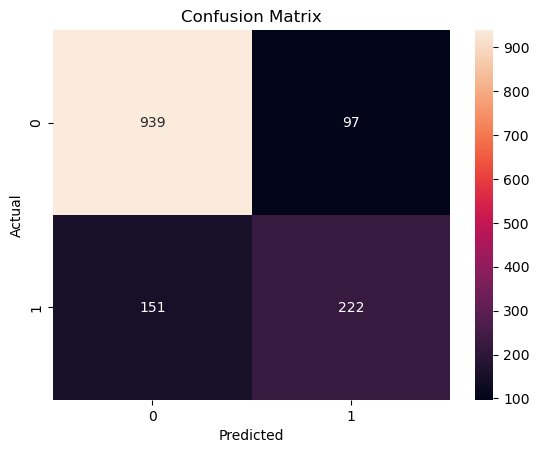

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


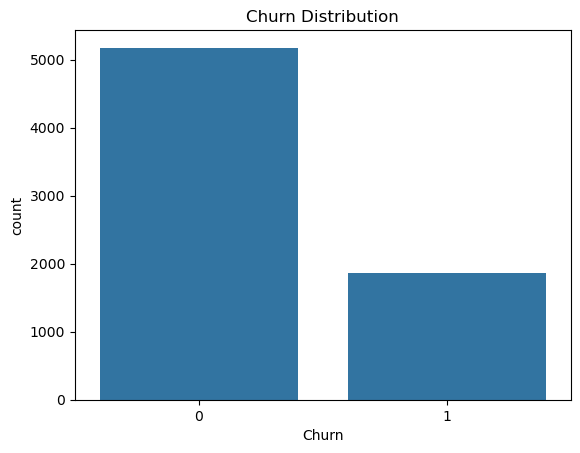

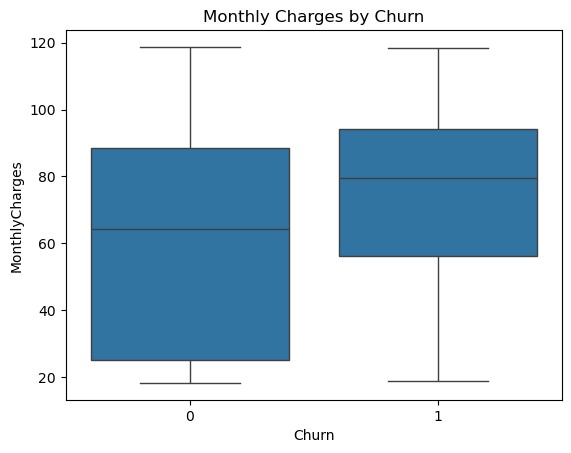

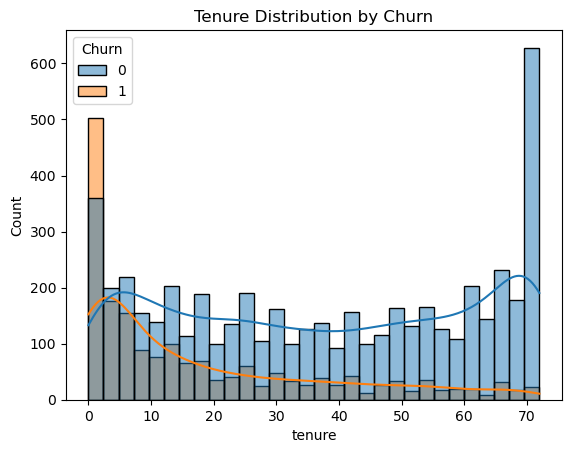

In [41]:
# Churn count
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Monthly Charges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

# Tenure distribution
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
plt.title('Tenure Distribution by Churn')
plt.show()


